Loading modules:
----------------

In [1]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
import seaborn as sns

Preparing DataFrame:
--------------------

In [2]:
df = pd.read_csv("steam-200k.csv", header=None, index_col=None, names=['UserID', 'Game', 'Action', 'Hours', 'Other'])
df = df[df['Action'] == 'play']
del df['Other']
del df['Action']
df.head()

,UserID,Game,Hours
1,151603712,The Elder Scrolls V Skyrim,273.0
3,151603712,Fallout 4,87.0
5,151603712,Spore,14.9
7,151603712,Fallout New Vegas,12.1
9,151603712,Left 4 Dead 2,8.9


Top 20 Games Based on Hours and Users:
--------------------------------------

*Preparing data for plotting*

In [6]:
Top20_hours = df.groupby("Game", as_index=False).Hours.aggregate('sum').sort_values('Hours', ascending=False)[:20]
#Top20_Users = df.groupby("Game", as_index=False).UserID.aggregate('count').sort_values('UserID', ascending=False)[:20].rename_axis({"UserID": "Users"}, axis="columns")

Top20_hours.set_index(pd.Index(list(range(20))), inplace=True)
#Top20_Users.set_index(pd.Index(list(range(20))), inplace=True)

*Plotting the Top 20's Hours Wise*

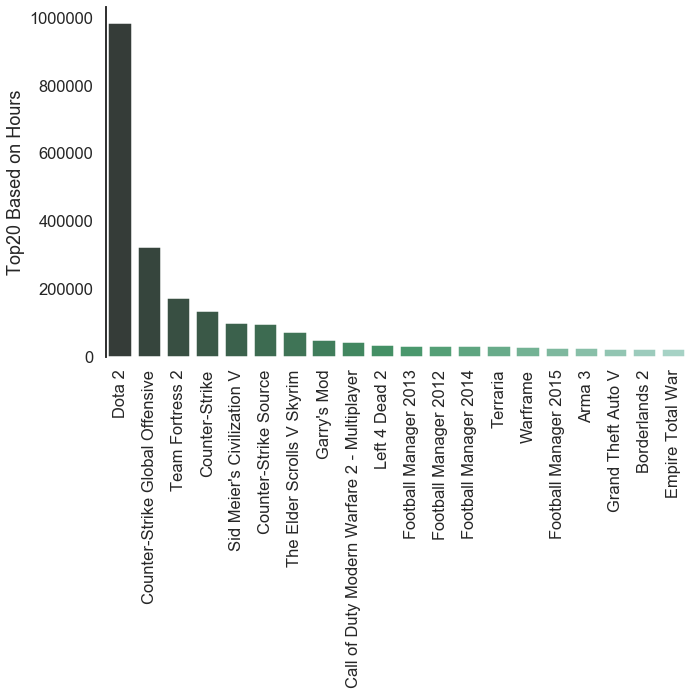

In [7]:
sns.set(style="white", context="talk")
fig1, ax1 = plt.subplots(figsize=(10, 10), sharex=True)  # Set up the matplotlib figure
x1 = np.array(list(Top20_hours['Game']))
y1 = np.array(list(Top20_hours['Hours']))
sns.barplot(x1, y1, palette="BuGn_d", ax=ax1)
ax1.set_ylabel("Top20 Based on Hours")
plt.xticks(rotation=90)
sns.despine(bottom=True)
plt.tight_layout(h_pad=5)

*Plotting the Top 20's Users Wise*

Adding Category to the Games:
-----------------------------

*Adding the columns for Genre and Game-play Mode. These are manually created columns with the help of google search. In case of any discrepancy, kindly suggest in the comments so that I can make the changes.*

In [10]:
Top20_hours['Genre'] = ['Strategy','Action','Action','Action','Strategy','Action','Action','Sandbox','Action','Action','Simulation','Simulation','Simulation','Action','Action','Simulation','Action','Action','Action','Strategy']
Top20_hours['Mode'] = ['Multiplayer','Multiplayer','Both','Multiplayer','Both','Multiplayer','Single Player','Single Player','Multiplayer','Both','Both','Both','Both','Both','Both','Both','Both','Both','Both','Both']

In [29]:
GG = Top20_hours[['Game', 'Genre']].set_index(keys = 'Game')
GG.to_csv('game_category.csv')

In [28]:
game_genre = GG.to_dict()['Genre']

AttributeError: 'dict' object has no attribute 'to_csv'

*Making Pie Charts to understand Categorization:*

In [ ]:
labels1 = ['Action','Sandbox','Simulation','Strategy']
values1 = [sum(Top20_hours['Genre'] == 'Action') , sum(Top20_hours['Genre'] == 'Sandbox') , sum(Top20_hours['Genre'] == 'Simulation') , sum(Top20_hours['Genre'] == 'Strategy')]
explode = (0.05, 0, 0, 0)
fig3, ax3 = plt.subplots()

ax3.pie(values1, explode=explode, labels=labels1, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax3.axis('equal')
plt.title('Most Played Genre in Top 20 Most Played Games')
plt.show()

In [ ]:
labels2 = ['Both','Multiplayer','Single Player']
values2 = [sum(Top20_hours['Mode'] == 'Both') , sum(Top20_hours['Mode'] == 'Multiplayer') , sum(Top20_hours['Mode'] == 'Single Player')]
explode = (0.05, 0, 0)
fig4, ax4 = plt.subplots()

ax4.pie(values2, explode=explode, labels=labels2, autopct='%1.1f%%',
        shadow=False, startangle=90)

ax4.axis('equal')
plt.title('Type of Games in Top 20 Most Played Games')
plt.show()